# **Data Cleaning**

## **0. Import Libraries**

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

---
## **1. Import Data**

In [65]:
orders = pd.read_csv('../data/raw/train/df_Orders.csv')
order_items = pd.read_csv('../data/raw/train/df_OrderItems.csv')
customers = pd.read_csv('../data/raw/train/df_Customers.csv')
payments = pd.read_csv('../data/raw/train/df_Payments.csv')
products = pd.read_csv('../data/raw/train/df_Products.csv')

## **2. Data Type Conversion**

### Orders Data (df_Orders.csv)

In [66]:
orders['order_id'] = orders['order_id'].astype('string')
orders['customer_id'] = orders['customer_id'].astype('string')
orders['order_status'] = orders['order_status'].astype('category')

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_timestamp'] = pd.to_datetime(orders['order_delivered_timestamp'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [67]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89316 non-null  string        
 1   customer_id                    89316 non-null  string        
 2   order_status                   89316 non-null  category      
 3   order_purchase_timestamp       89316 non-null  datetime64[ns]
 4   order_approved_at              89307 non-null  datetime64[ns]
 5   order_delivered_timestamp      87427 non-null  datetime64[ns]
 6   order_estimated_delivery_date  89316 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](4), string(2)
memory usage: 4.2 MB


#### Removing the insignificant 2016 order data.
Removing 2016 data from all tables which contain order_id for 2016 orders.

In [68]:
# Remove 2016 orders in the orders dataframe
orders = orders[orders['order_purchase_timestamp'].dt.year != 2016]

# Now filter related tables (e.g., order_items, payments) by order_id
order_items = order_items[order_items['order_id'].isin(orders['order_id'])]
payments = payments[payments['order_id'].isin(orders['order_id'])]

### Handling Missing <span style='color: gray;'>*order_approved_at*</span> Values

- There are 9 rows where order_approved_at is missing, but the order_status is 'delivered', and all other timestamps (purchase, delivery, etc.) are present.
- These are complete orders, so the missing approval timestamp is probably due to some issues in logging.
- **Action Taken:** No rows were removed. As these entries/rows are complete and valid for sales and delivery analysis.
- Going further, if approval analysis is required a flag column for this will be added.

In [69]:
orders[orders['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
10788,4Itts2TBUQzs,Z3dI7uRBfJOD,delivered,2017-02-17 13:05:55,NaT,2017-03-02 11:09:19,2017-03-20
16137,6MPB830Ufh0n,SOtqXN1MqcLj,delivered,2017-02-17 17:21:55,NaT,2017-03-03 12:16:03,2017-03-20
28951,lqW95yj4n1Qd,jCPmhkcyVR1z,delivered,2017-02-18 15:52:27,NaT,2017-03-07 13:57:47,2017-03-29
30494,dn1i9D4DFVZ2,Es95IGZCDDXy,delivered,2017-02-17 15:53:27,NaT,2017-03-03 11:47:47,2017-03-23
41752,vBZCEuCG9Hf1,zHEH7vdeO6UZ,delivered,2017-02-18 11:04:19,NaT,2017-03-02 16:15:23,2017-03-22
42772,PXwPIjmXCehX,gjKhFw8AFnW1,delivered,2017-02-18 16:48:35,NaT,2017-03-09 07:28:47,2017-03-31
47768,Yg9HDkWtA3Q3,GFg4QWN26cLs,delivered,2017-02-19 01:28:47,NaT,2017-03-02 03:41:58,2017-03-27
59434,hynO4uEubWbe,QdQBjy8APVMg,delivered,2017-02-18 14:40:00,NaT,2017-03-01 13:25:33,2017-03-17
65247,Uso7EoEPMrLU,rKJOxQc2PTfc,delivered,2017-01-19 22:26:59,NaT,2017-02-06 14:22:19,2017-03-16


### Handling Missing <span style='color: gray;'>*order_delivered_timestamp*</span> Values

- There are 1889 rows where order_delivered_timestamp is missing.
- These are complete orders, so the missing approval timestamp is probably due to some issues in logging.
- **Action Taken:** No rows were removed. As these entries/rows are complete and valid for sales and delivery analysis.
- Going further, if approval analysis is required a flag column for this will be added.

In [70]:
orders[orders['order_delivered_timestamp'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
15,P5R6jr1qZdh4,FrEvnEiMKGpr,canceled,2017-07-24 11:38:43,2017-07-24 11:50:18,NaT,2017-08-07
41,C21fWds5zL0W,iFsAJRrzVaTS,shipped,2017-02-04 12:58:55,2017-02-04 13:10:38,NaT,2017-03-15
86,vSug5AqRo9gE,oWBBqGwqpx4m,shipped,2017-05-07 10:22:58,2017-05-09 09:35:20,NaT,2017-06-12
89,2HQ26ShSPhCA,uvuFFZDOAlU7,canceled,2017-07-29 12:56:17,2017-07-29 13:05:18,NaT,2017-08-18
133,1By8LOosrvF2,grsbZ5L1H5ty,canceled,2017-11-06 15:47:20,2017-11-07 07:30:29,NaT,2017-11-28
...,...,...,...,...,...,...,...
89196,VP3EBMExdh7K,acB2XNtto2SX,shipped,2018-01-24 18:19:18,2018-01-24 18:37:41,NaT,2018-03-01
89226,0jPFvDPItbRN,Hb5m8q1YZEfv,canceled,2017-08-02 14:08:18,2017-08-02 14:23:13,NaT,2017-08-24
89234,QzxMjvdMpOEI,yCbzy1m4tTUA,shipped,2017-09-15 09:05:41,2017-09-15 09:15:13,NaT,2017-10-05
89262,rnnNWGgyHsA5,6LYRxLvrUzNy,canceled,2017-12-13 12:55:38,2017-12-13 13:11:58,NaT,2018-01-02


#### Canceled orders with Non-null delivered timestamps
Canceled orders should not have delivered timestamps. These are removed.

In [71]:
orders[(orders['order_status'] == 'canceled') & (orders['order_delivered_timestamp'].notna())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
45856,STGODjAZ1w0n,SOg6P6UXk8Nu,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-03-21 22:03:51,2018-03-09


In [72]:
# removing canceled order with non-null delivered timestamp
orders = orders[~((orders['order_status'] == 'canceled') & orders['order_delivered_timestamp'].notna())]

In [73]:
orders[(orders['order_status'] == 'canceled') & (orders['order_delivered_timestamp'].isna())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
15,P5R6jr1qZdh4,FrEvnEiMKGpr,canceled,2017-07-24 11:38:43,2017-07-24 11:50:18,NaT,2017-08-07
89,2HQ26ShSPhCA,uvuFFZDOAlU7,canceled,2017-07-29 12:56:17,2017-07-29 13:05:18,NaT,2017-08-18
133,1By8LOosrvF2,grsbZ5L1H5ty,canceled,2017-11-06 15:47:20,2017-11-07 07:30:29,NaT,2017-11-28
139,70G4cTVwm38h,WnCydkx96ul3,canceled,2018-07-04 16:05:56,2018-07-06 02:55:16,NaT,2018-08-22
146,aDxB5SgA7C4q,ejNZQ7X7x2T3,canceled,2018-02-05 16:30:33,2018-02-05 16:52:11,NaT,2018-03-12
...,...,...,...,...,...,...,...
89082,aG78pToOaDfa,1dd6SEHhWkP0,canceled,2017-08-16 16:15:31,2017-08-18 02:16:03,NaT,2017-08-29
89136,21GpVhZQJGfP,RcOEzkum8F9x,canceled,2017-09-15 09:29:20,2017-09-19 03:37:51,NaT,2017-10-05
89165,sjtJ9gzepMyS,W66KjtqQwS7L,canceled,2017-11-14 21:58:32,2017-11-16 22:31:07,NaT,2017-11-28
89226,0jPFvDPItbRN,Hb5m8q1YZEfv,canceled,2017-08-02 14:08:18,2017-08-02 14:23:13,NaT,2017-08-24


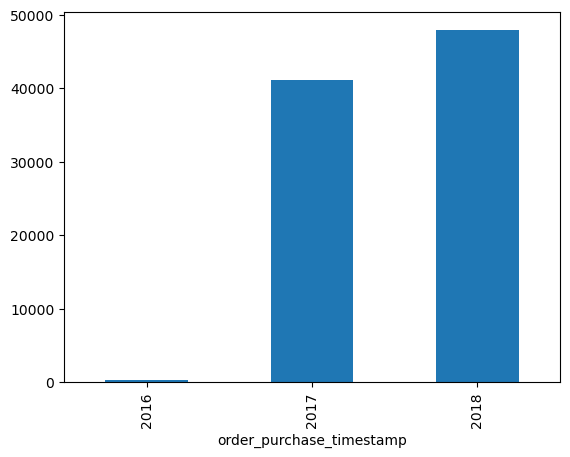

In [30]:
orders['order_purchase_timestamp'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.show()

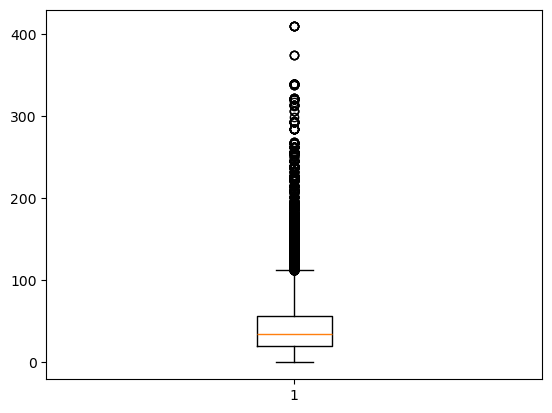

In [6]:
# remove plots as it belongs to cleaning & exporation part, same for prices
plt.boxplot(order_items['shipping_charges'])
plt.show()